In [1]:
%matplotlib inline

## functions for doing the work

For a given `filename`, `colnum` and `rank` create the desired matrix, and possibly save it in a comma separate value format that is readable by excel, origin, etc.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def create_matrix(filename, colnum, rank, sep=':', savecsv=False):

    df = pd.read_csv(filename, sep=sep, header=None, comment='#')
    matrix = df.iloc[:, [colnum]].values.reshape(rank, rank)

    if savecsv:
        mname = os.path.splitext(os.path.basename(filename))[0] + '_col-{0:d}'.format(colnum) + '.csv'
        np.savetxt(mname, matrix)

    return matrix

def heatmap(matrix, size, cmap='viridis', show_colorbar=True):
    '''
    Args:
        matrix : array_like
            Matrix to be colormapped
        size : int
            Size of the plot in inches
    '''

    plt.figure(figsize=(size, size))
    plt.pcolor(m, cmap=cmap)

    ax = plt.gca()
    ax.set_aspect('equal')
    
    if show_colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        plt.colorbar(cax=cax)

    plt.tight_layout()
    plt.show()

## create the matrix with a specified rank from a given column

In [3]:
m = create_matrix('data/result_slice01.txt', colnum=1, rank=58)

# plot the heatmap

Other possible heatmaps are listed in [matplotlib documentation](https://matplotlib.org/examples/color/colormaps_reference.html)

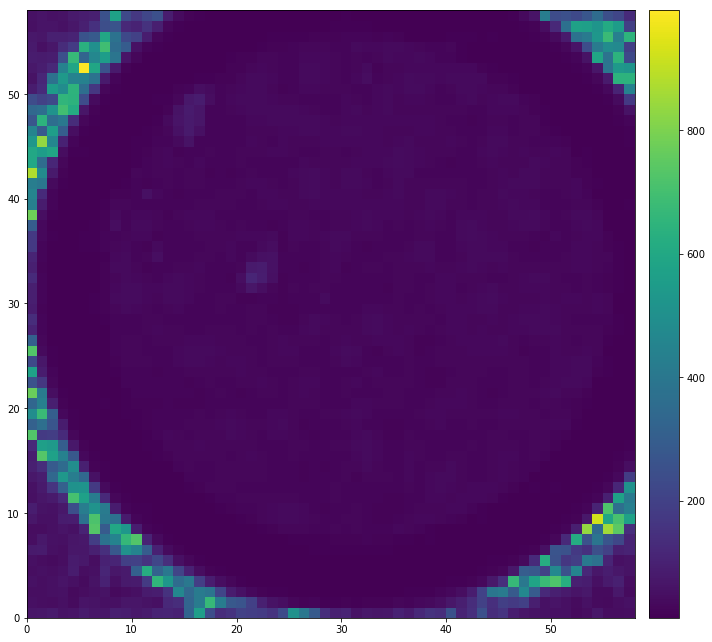

In [4]:
heatmap(m, 10)

## different colum and colormap

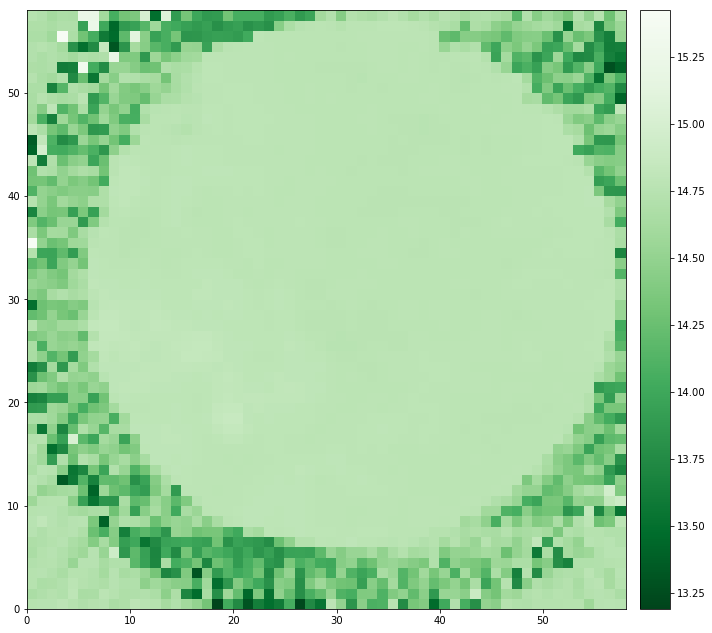

In [8]:
m = create_matrix('data/result_slice01.txt', colnum=6, rank=58)
heatmap(m, 10, cmap='Greens_r')